<h1> Data Science in Marketing: Customer Segmentation with Python</h1>

<h2>1. Mempersiapkan Library</h2>

In [1]:
# Mempersiapkan Library
import pandas as pd # library yang digunakan untuk melakukan pemrosesan analisi data
import matplotlib.pyplot as plt # Library yang digunakan untuk visualisasi data
import seaborn as sns # Library diatas matplotlib yang digunakan untuk visualisasi data
import pickle # Library yang digunakan untuk menyimpan model
from sklearn.preprocessing import LabelEncoder # Library yang digunakan untuk encoding label
from kmodes.kmodes import KModes # Library yang digunakan untuk clustering
from kmodes.kprototypes import KPrototypes # Library yang digunakan untuk clustering
from pathlib import Path # Library yang digunakan untuk path file

<h2>2. Membaca Data Pelanggan</h2>

In [2]:
# Membaca dataset
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/customer_segments.txt', sep='\t')

# Menampilkan 5 data teratas
display(df.head())

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206


<h2>3. Melihat Informasi dari Data</h2>

In [3]:
# Menampilkan informasi dataset
print(f"Informasi Dataset : \n")
print(df.info())

Informasi Dataset : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB
None


<h2>4. Kesimpulan: Informasi Dasar Data</h2>
<ul>
  <li>Data yang akan digunakan terdiri dari 50 baris dan 7 kolom</li>
  <li>Tidak ada null value</li>
  <li>2 kolom tipe numeric 5 kolom tipe string</li>
</ul>

<h2>5. Melakukan Eksplorasi Data</h2>

<h2>6. Eksplorasi Data Numerik</h2>

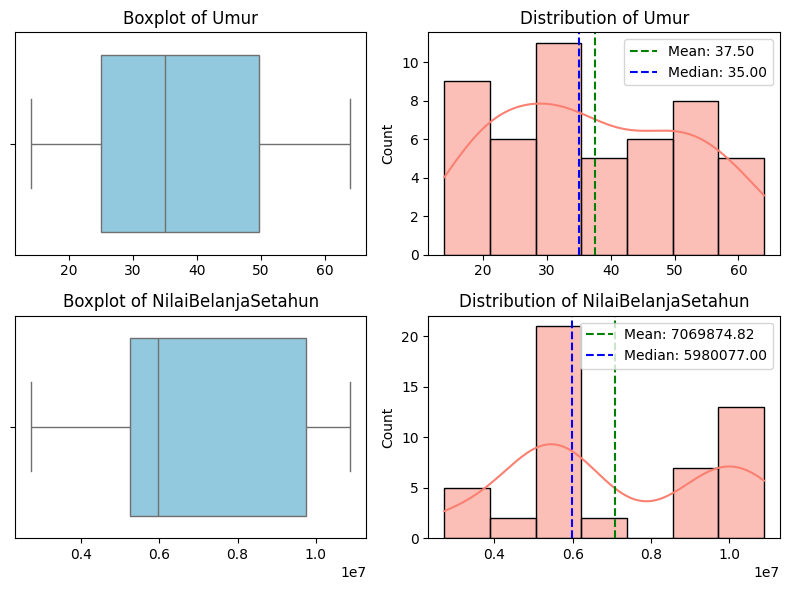

In [4]:
# Fungsi untuk membuat plot
def observasi_num(features):
       
    # Buat subplot
    fig, axs = plt.subplots(2, 2, figsize=(8, 6))
    
    # Loop melalui setiap fitur
    for i, kol in enumerate(features):
        # Boxplot
        sns.boxplot(x=df[kol], ax=axs[i, 0], color='skyblue')
        axs[i, 0].set_title(f'Boxplot of {kol}', fontsize=12)
        axs[i, 0].set_xlabel('')
        
        # Histogram dengan KDE
        sns.histplot(df[kol], kde=True, ax=axs[i, 1], color='salmon')
        axs[i, 1].set_title(f'Distribution of {kol}', fontsize=12)
        axs[i, 1].set_xlabel('')
        
        # Tambahkan informasi statistik
        mean_val = df[kol].mean()
        median_val = df[kol].median()
        axs[i, 1].axvline(mean_val, color='green', linestyle='--', label=f'Mean: {mean_val:.2f}')
        axs[i, 1].axvline(median_val, color='blue', linestyle='--', label=f'Median: {median_val:.2f}')
        axs[i, 1].legend()
    
    # Atur layout
    plt.tight_layout()
    plt.show()

# Memanggil fungsi observasi_num
observasi_num(['Umur','NilaiBelanjaSetahun'])

<h3>Ringkasan Observasi Data Numerik</h3>
<h4><strong>1. Umur</strong></h4>
<ol>
  <li>Distribusi umur pelanggan cenderung normal dengan sedikit kemiringan ke kanan (right-skewed)</li>
  <li>Sebagian besar pelanggan berumur 20-50 tahun</li>
  <li>Tidak ada outlier signifikan</li>
</ol>
<h4><strong>2. Nilai Belanja Setahun</strong></h4>
<ol>
  <li>Distribusi nilai belanja setahun pelanggan memiliki kemiringan ke kanan (right-skewed) itu artinya ada beberapa pelanggan dengan nilai belanja yang sangat tinggi</li>
  <li>Sebagian besar pelanggan memiliki nilai belanja setahun bernilai 4.000.000 - 8.000.000</li>
  <li>Ada outlier yang siginifikan artinya ada beberapa pelanggan dengan nilai belanja yang sangat tinggi</li>
</ol>

<h2>7. Eksplorasi Data Kategorikal</h2>

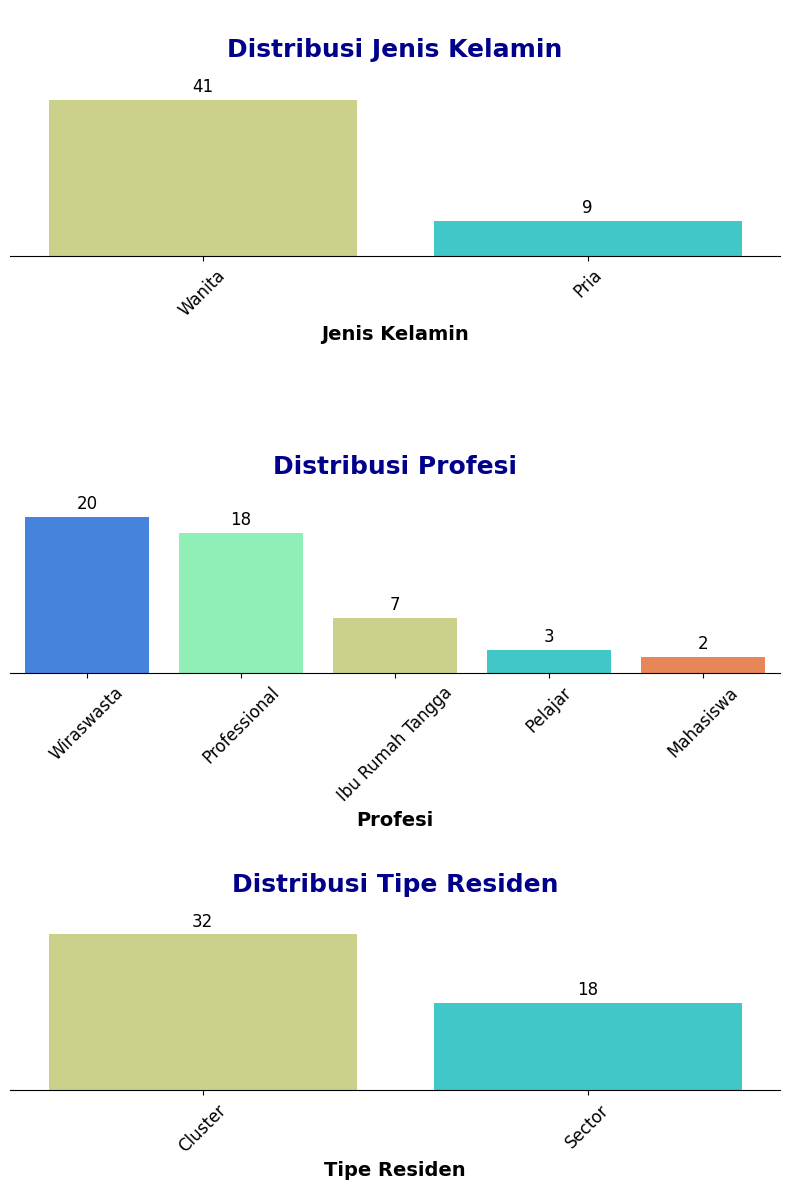

In [5]:
# Menyiapkan Kolo Kategorikal
kolom_kategorikal = ['Jenis Kelamin', 'Profesi', 'Tipe Residen']

# Membuat canvas
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Membuat plot untuk setiap kolom kategorikal
for i, kol in enumerate(kolom_kategorikal):
    # Membuat Plot dengan warna yang lebih menarik
    sns.countplot(data=df, x=kol, hue=kol, order=df[kol].value_counts().index, ax=axs[i], palette='rainbow')
    axs[i].set_title(f'\nDistribusi {kol}\n', fontsize=18, fontweight='bold', color='darkblue')
    axs[i].set_xlabel(kol, fontsize=14, fontweight='bold')
    axs[i].set_ylabel('Count', fontsize=14, fontweight='bold')
    
    # Memberikan anotasi
    for p in axs[i].patches:
        axs[i].annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center',
                        va='center',
                        xytext=(0, 10),
                        textcoords='offset points',
                        fontsize=12,
                        color='black')

    # Setting Plot
    sns.despine(right=True, top=True, left=True)
    axs[i].axes.yaxis.set_visible(False)
    axs[i].tick_params(axis='x', labelsize=12, rotation=45)  # Rotasi label sumbu x
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)  # Menambahkan grid

# Menyesuaikan layout
plt.tight_layout()
plt.show()

<h3>Ringkasan Observasi Data Kategorikal</h3>
<h4><strong>1. Ketidakseimbangan Gender</strong></h4>
<ul>
  <li>Dataset di dominasi oleh Wanita sehingga perlu diperhatikan jika analisis mempertimbangkan gender</li>
</ul>
<h4><strong>2. Profesi Dominan</strong></h4>
<ul>
  <li>Dataset di dominasi oleh profesi Wiraswasta dan Professiional sehingga strategi bisnis atau pemasaran dapat difokuskan pada kelompok ini</li>
</ul>
<h4><strong>3. Preferensi Tempat Tinggal</strong></h4>
<ul>
  <li>Dataset di dominasi oleh Cluster strategi bisnis atau layanana bisnis bisa disesuaikan dengan karakteristik pelanggan yang tinggal di Cluster</li>
</ul>

<h3>Ringkasan Observasi Dataset</h3>
<ul>
  <li>Rata-rata umur pelanggan adalan 37,5 Tahun</li>
  <li>Rata-rata nilai belanja setahun pelanggan adalah Rp. 7.069.874,82</li>
  <li>Jenis kelamin pelanggan didominasi oleh Wanita 41 (82%) sedangan Pria 9 (18%)</li>
  <li>Profesi di dominasi oleh Wiraswasta 20 (40%) Professional 18 (36%) sisanya 24%</li>
  <li>Pelanggan mayoritas tinggal di Cluster 32 (64%) sedangan untuk sector 18 (36%)</li>
</ul>

<h3><strong>Tips !!!</strong></h3>
<p>Kita dapat mengenal data kita lebih jauh lagi pada tahapan eksplorasi data ini. Proses eksplorasi data bisa berupa univariate maupun multivariate data eksplorasi. Eksplorasi Data Univariate melihat karakteristik tiap-tiap feature, misalnya dengan melihat statistik deskriptif, membuat histogram, kdeplot, countplot maupun boxplot. Sedangkan untuk Eksplorasi Data Multivariate, kita melihat hubungan tiap variabel dengan variabel lainnya, misal kan dengan membuat korelasi matrix, melihat predictive power, cross tabulasi, dan lainnya.</p>

<h2>8. Mempersiapkan Data Sebelum Permodelan</h2>
<h3>Syarat - Syarat Clustering Menggunakan Model <strong>K-Prototype</strong></h3>
<ol>
  <li><strong>Data Numerik</strong> memiliki <strong>Skala</strong> yang sama dengan metode <strong>Standarisasi</strong> Data Numerik</li>
  <li><strong>Data Kategorikal</strong> dirubah menjadi <strong>Data Numerik</strong> dengan metode <strong>Encoding</strong></li>
</ol>

<h2>8. Apa itu <strong>Clustering</strong> dan Algoritma <strong>K-Prototype</strong></h2>
<ul>
  <li><strong>Clustering</strong> : Proses pembagian objek - objek ke dalam beberapa kelompok (cluster) berdasarkan tingkat kemiripan antara sati objek dengan yang lain</li>
  <li><strong>K-Prototype</strong> = <strong>K-Means</strong> + <strong>K-Modes</strong> --> Integrasi yang komplek</li>
  <li><strong>K-Means</strong> : Algoritma untuk melakukan Clustering <strong>Data Numerik</strong></li>
  <li><strong>K-Modes</strong> : Algoritma untuk melakukan Clustering <strong>Data Kategorikal</strong></li>
  <li><strong>K-Prototype</strong> : Algoritma untuk melakukan Clustering <strong>Data Numerik</strong> & <strong>Data Kategorikal</strong></li>
</ul>

<h2>9. Mencari Jumlah Cluster yang Optimal</h2>